### Imputation

Imputation is the process of subsituting the missing data with substituted values. In Machine Learning, while building models we need to take care of the missing values.

We can use the imputation technique to fill up the missing values.
sklearn provides the `SimpleImputer` class for filling up missing values with, say, the median value or the mean value.
You can set its `strategy` parameter to one of the following values:
+ mean - missing values are replaced using the mean along each column
+ median - missing values are replaced using the median along each column
+ most_frequent - missing values are replaced using the most frequent value along each column
+ constant - missing values are replaced with a user-specified value

Note: Imputation won't work if your features have non-numeric data! Make sure that all the features have numeric data before calling the `fit` method or else you'll get an error.

Lets take a very simple example for understanding.

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Create a sample DataFrame
df = pd.DataFrame({
    "customer_id": [1, 2, 3, 4, 5, 6, 7],
    "city": ["New York", "London", "Tokyo", "New York", "Paris", "Tokyo", "Paris"],
    "age": [30, 25, 40, 22, 35, None, 51],
    "income": [50000, 40000, None, 35000, None, 90000, 65000]
})


df

,customer_id,city,age,income
0,1,New York,30.0,50000.0
1,2,London,25.0,40000.0
2,3,Tokyo,40.0,NaN
3,4,New York,22.0,35000.0
4,5,Paris,35.0,NaN
5,6,Tokyo,NaN,90000.0
6,7,Paris,51.0,65000.0


In [6]:
df.isna().sum()

customer_id    0
city           0
age            1
income         2
dtype: int64

Observe that we have a few missing values here: 1 for age and 2 for income.

Note that the city column has non-numeric values, lets use one-hot encoding to transform them to numeric features. 
Otherwise, we'll get the following error when calling the fit method:

`ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'New York'`

You can also choose to apply the imputer specifically only on the numeric columns, then you won't need to one-hot encode the non-numeric data

In [7]:
encoded = pd.get_dummies(df, columns=['city'], dtype=float)
encoded

,customer_id,age,income,city_London,city_New York,city_Paris,city_Tokyo
0,1,30.0,50000.0,0.0,1.0,0.0,0.0
1,2,25.0,40000.0,1.0,0.0,0.0,0.0
2,3,40.0,NaN,0.0,0.0,0.0,1.0
3,4,22.0,35000.0,0.0,1.0,0.0,0.0
4,5,35.0,NaN,0.0,0.0,1.0,0.0
5,6,NaN,90000.0,0.0,0.0,0.0,1.0
6,7,51.0,65000.0,0.0,0.0,1.0,0.0


In [8]:
# create a SimpleImputer object
# setting the strategy to median for filling the missing values
# also set the output as a pandas dataframe.

imputer = SimpleImputer(strategy='median').set_output(transform='pandas')

# lets check the statistics learnt by the imputer on the dataset
# imputer.statistics_

In [9]:
# the median values of each of our columns, we'll use them to fill the missing values
encoded.median()

customer_id          4.0
age                 32.5
income           50000.0
city_London          0.0
city_New York        0.0
city_Paris           0.0
city_Tokyo           0.0
dtype: float64

In [10]:
# fit the imputer to the dataframe and transform the missing values using: fit_transform() method
imputer.fit_transform(encoded)

# observe all the missing values have been replaced with the median value.

,customer_id,age,income,city_London,city_New York,city_Paris,city_Tokyo
0,1.0,30.0,50000.0,0.0,1.0,0.0,0.0
1,2.0,25.0,40000.0,1.0,0.0,0.0,0.0
2,3.0,40.0,50000.0,0.0,0.0,0.0,1.0
3,4.0,22.0,35000.0,0.0,1.0,0.0,0.0
4,5.0,35.0,50000.0,0.0,0.0,1.0,0.0
5,6.0,32.5,90000.0,0.0,0.0,0.0,1.0
6,7.0,51.0,65000.0,0.0,0.0,1.0,0.0


Applying the imputer only on the columns with missing values instead of the entire data:

In [12]:
df

,customer_id,city,age,income
0,1,New York,30.0,50000.0
1,2,London,25.0,40000.0
2,3,Tokyo,40.0,NaN
3,4,New York,22.0,35000.0
4,5,Paris,35.0,NaN
5,6,Tokyo,NaN,90000.0
6,7,Paris,51.0,65000.0


In [19]:
# age and income are the only columns with missing values, we can choose to apply imputation only on these
imputer.fit_transform(df[['income']])

# and similarly for age

,income
0,50000.0
1,40000.0
2,50000.0
3,35000.0
4,50000.0
5,90000.0
6,65000.0


In [21]:
# adding the imputed data into the dataframe
df['income'] = imputer.fit_transform(df[['income']])
df['age'] = imputer.fit_transform(df[['age']])
df

,customer_id,city,age,income
0,1,New York,30.0,50000.0
1,2,London,25.0,40000.0
2,3,Tokyo,40.0,50000.0
3,4,New York,22.0,35000.0
4,5,Paris,35.0,50000.0
5,6,Tokyo,32.5,90000.0
6,7,Paris,51.0,65000.0


#### KNNImputer

Apart from SimpleImputer, sklearn also provides KNNImputer for imputing based on the K-NN strategy.

+ Uses k-nearest neighbours approach to ﬁll missing values in a dataset.
+ The missing value of an attribute in a speciﬁc example is ﬁlled with the mean value of the same attribute of n_neighbors closest neighbors.
+ The nearest neighbours are decided based on Euclidean distance.

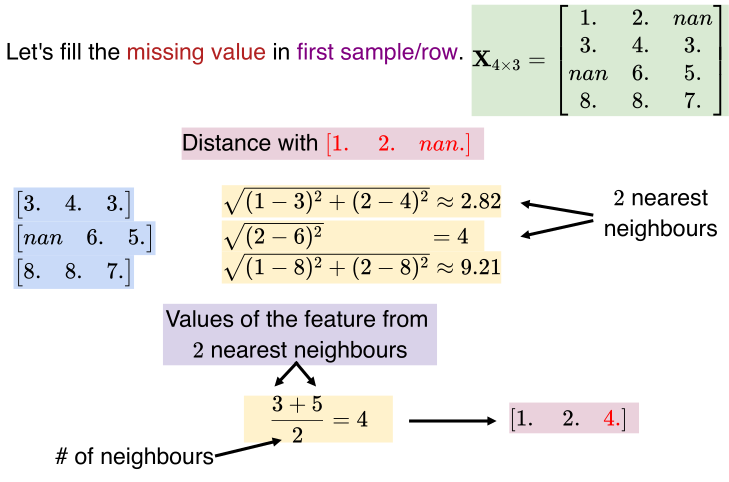

Here's an example:

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

X = np.array([[1, 2, None], [3, 4, 3], [None, 6, 5], [8, 8, 7]])
print(X)
knn = KNNImputer(n_neighbors=2, weights='uniform') # we're considering the 2 nearest neighbors
knn.fit_transform(X)

[[1 2 None]
 [3 4 3]
 [None 6 5]
 [8 8 7]]


array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

Another example:

In [2]:
import pandas as pd
from sklearn.impute import KNNImputer

# Create a sample DataFrame
df = pd.DataFrame({
    "bedrooms": [3, 2, None, 4, 3, None, 2, 3],
    "bathrooms": [2, None, 1, 3, None, 2, None, 2],
    "price": [250000, 200000, 150000, 300000, 220000, 180000, 190000, 240000]
})

df

,bedrooms,bathrooms,price
0,3.0,2.0,250000
1,2.0,NaN,200000
2,NaN,1.0,150000
3,4.0,3.0,300000
4,3.0,NaN,220000
5,NaN,2.0,180000
6,2.0,NaN,190000
7,3.0,2.0,240000


In [7]:
# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=3, weights='uniform')

# Fill in the missing values
imputed_data = imputer.fit_transform(df)

# Convert the imputed data back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

# Print the imputed DataFrame
df_imputed

,bedrooms,bathrooms,price
0,3.000000,2.000000,250000.0
1,2.000000,2.000000,200000.0
2,2.333333,1.000000,150000.0
3,4.000000,3.000000,300000.0
4,3.000000,2.000000,220000.0
5,2.333333,2.000000,180000.0
6,2.000000,1.666667,190000.0
7,3.000000,2.000000,240000.0
